In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

data = load_dataset("NebulaByte/E-Commerce_Customer_Support_Conversations")

(…)-00000-of-00001-a5a7c6e4bb30b016.parquet:   0%|          | 0.00/827k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
print(data)

DatasetDict({
    train: Dataset({
        features: ['issue_area', 'issue_category', 'issue_sub_category', 'issue_category_sub_category', 'customer_sentiment', 'product_category', 'product_sub_category', 'issue_complexity', 'agent_experience_level', 'agent_experience_level_desc', 'conversation'],
        num_rows: 1000
    })
})


In [ ]:
from datasets import DatasetDict

In [ ]:
train_dataset = data["train"]
train_dataset.to_csv("train_dataset.csv")

Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

2509114

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("train_dataset.csv")

In [ ]:
data.head()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...


Issue Distribution:
 issue_area
Cancellations and returns    286
Order                        270
Login and Account            151
Shopping                     116
Warranty                     105
Shipping                      72
Name: count, dtype: int64

Issue Complexity Distribution:
 issue_complexity
less      488
medium    426
high       86
Name: count, dtype: int64

Agent Experience Level Distribution:
 agent_experience_level
junior           507
experienced      348
inexperienced    145
Name: count, dtype: int64

Customer Sentiment Distribution:
 customer_sentiment
neutral       552
negative      316
frustrated    105
positive       27
Name: count, dtype: int64

Product Category Distribution:
 product_category
Appliances        465
Electronics       303
Men/Women/Kids    232
Name: count, dtype: int64


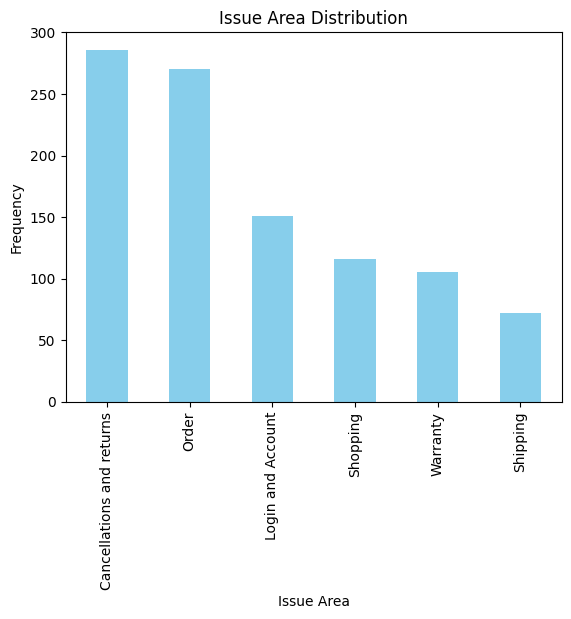

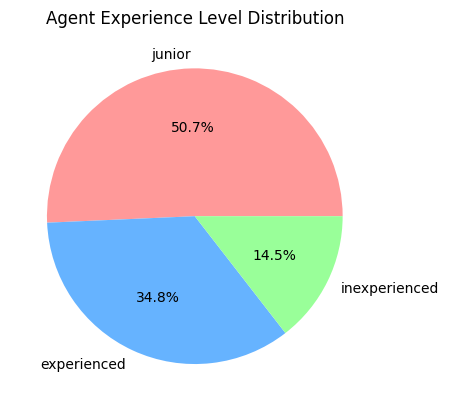

In [ ]:
# 1. Issue Distribution
issue_distribution = data["issue_area"].value_counts()

# 2. Issue Complexity Breakdown
complexity_distribution = data["issue_complexity"].value_counts()

# 3. Agent Experience Level
experience_distribution = data["agent_experience_level"].value_counts()

# 4. Customer Sentiment
sentiment_distribution = data["customer_sentiment"].value_counts()

# 5. Product Category Distribution
product_distribution = data["product_category"].value_counts()

# Display Results
print("Issue Distribution:\n", issue_distribution)
print("\nIssue Complexity Distribution:\n", complexity_distribution)
print("\nAgent Experience Level Distribution:\n", experience_distribution)
print("\nCustomer Sentiment Distribution:\n", sentiment_distribution)
print("\nProduct Category Distribution:\n", product_distribution)

# Visualization (if needed)
import matplotlib.pyplot as plt

# Plot Issue Distribution
issue_distribution.plot(kind="bar", title="Issue Area Distribution", color="skyblue")
plt.xlabel("Issue Area")
plt.ylabel("Frequency")
plt.show()

# Plot Agent Experience Level
experience_distribution.plot(kind="pie", autopct="%1.1f%%", title="Agent Experience Level Distribution", colors=["#ff9999", "#66b3ff", "#99ff99"])
plt.ylabel("")  # Hide y-label
plt.show()